<a href="https://colab.research.google.com/github/binhduc0402/BT_AI/blob/main/Power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4121683b613cb602ebed7df331fd4ce655148b38b164c4928cf928ab713388e7
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


30.000000000000007


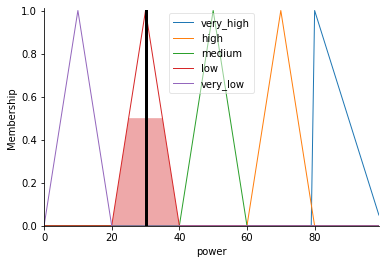

In [16]:
import skfuzzy as fuzzy
import numpy as np
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
time=ctrl.Antecedent(np.arange(10,300,1),'time')
rice=ctrl.Antecedent(np.arange(100,2000,1),'rice')
power=ctrl.Consequent(np.arange(0,100,1),'power')

time['very_fast']=fuzzy.trimf(time.universe,[0,0,40])
time['fast']=fuzzy.trimf(time.universe,[35,50,65])
time['medium']=fuzzy.trimf(time.universe,[40,65,90])
time['slow']=fuzzy.trimf(time.universe,[80,100,150])
time['very_slow']=fuzzy.trimf(time.universe,[150,220,300])

rice['very_much']=fuzzy.trimf(rice.universe,[1700,2000,2000])
rice['much']=fuzzy.trimf(rice.universe,[1400,1500,1800])
rice['medium']=fuzzy.trimf(rice.universe,[1200,1400,1600])
rice['less']=fuzzy.trimf(rice.universe,[1100,1200,1300])
rice['very_less']=fuzzy.trimf(rice.universe,[100,100,1200])

power['very_high']=fuzzy.trimf(power.universe,[80,80,100])
power['high']=fuzzy.trimf(power.universe,[60,70,80])
power['medium']=fuzzy.trimf(power.universe,[40,50,60])
power['low']=fuzzy.trimf(power.universe,[20,30,40])
power['very_low']=fuzzy.trimf(power.universe,[0,10,20])

rule1=ctrl.Rule(time['very_fast']&rice['very_much'],power['very_high'])
rule2 = ctrl.Rule(time['very_fast'] & rice['much'], power['high'])
rule3 = ctrl.Rule(time['very_fast'] & rice['medium'], power['medium'])
rule4 = ctrl.Rule(time['very_fast'] & rice['less'], power['low'])
rule5 = ctrl.Rule(time['very_fast'] & rice['very_less'], power['very_low'])

rule6 = ctrl.Rule(time['fast'] & rice['very_much'], power['very_high'])
rule7 = ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule8 = ctrl.Rule(time['fast'] & rice['medium'], power['medium'])
rule9 = ctrl.Rule(time['fast'] & rice['less'], power['low'])
rule10 = ctrl.Rule(time['fast'] & rice['very_less'], power['very_low'])

rule11 = ctrl.Rule(time['medium'] & rice['very_much'], power['high'])
rule12 = ctrl.Rule(time['medium'] & rice['much'], power['medium'])
rule13 = ctrl.Rule(time['medium'] & rice['medium'], power['medium'])
rule14 = ctrl.Rule(time['medium'] & rice['less'], power['low'])
rule15 = ctrl.Rule(time['medium'] & rice['very_less'], power['very_low'])

rule16 = ctrl.Rule(time['slow'] & rice['very_much'], power['medium'])
rule17 = ctrl.Rule(time['slow'] & rice['much'], power['low'])
rule18 = ctrl.Rule(time['slow'] & rice['medium'], power['low'])
rule19 = ctrl.Rule(time['slow'] & rice['less'], power['very_low'])
rule20 = ctrl.Rule(time['slow'] & rice['very_less'], power['very_low'])

rule21 = ctrl.Rule(time['very_slow'] & rice['very_much'], power['low'])
rule22 = ctrl.Rule(time['very_slow'] & rice['much'], power['very_low'])
rule23 = ctrl.Rule(time['very_slow'] & rice['medium'], power['very_low'])
rule24 = ctrl.Rule(time['very_slow'] & rice['less'], power['very_low'])
rule25 = ctrl.Rule(time['very_slow'] & rice['very_less'], power['very_low'])

power_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powered=ctrl.ControlSystemSimulation(power_ctrl)
powered.input['time']=90
powered.input['rice']=1400
powered.compute()
print(powered.output['power'])
power.view(sim=powered)


